In [21]:
from Bio import Align
from Bio.Align import substitution_matrices
from hydra import initialize, compose
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from src.similarity import load_similarity_matrix

In [22]:
with initialize(version_base=None, config_path="../configs/filepaths"):
    filepaths = compose(config_name="base")

In [23]:
aligner = Align.PairwiseAligner()
aligner.substitution_matrix = substitution_matrices.load("BLOSUM62")
aligner.open_gap_score = -11
aligner.extend_gap_score = -1

In [24]:
seq1 = "AQVKGHGKKVADALTNAVAHVDDMPNALSALSDLHAHKLRVDPVNFKLLSHCLLVTLAAH"
seq2 = "PKVKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHH"
alignments = aligner.align(seq1, seq2)
print(alignments.score)
len(alignments)

149.0


1

In [25]:
seq1 = "A"
seq2 = "W"
alignments = aligner.align(seq1, seq2)
print(len(alignments))
print(alignments[0])

1
target            0 A 1
                  0 . 1
query             0 W 1



In [26]:
alignments.score

-3.0

In [27]:
for elt in alignments:
    print(elt.score)

-3.0


In [28]:
S = load_similarity_matrix(Path(filepaths.results) / "similarity_matrices", "sprhea", "v3_folded_test", "blosum")

In [37]:
np.percentile(S, 80)

0.0

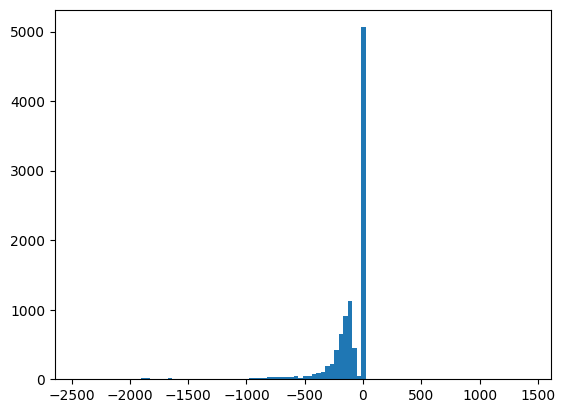

In [39]:
plt.hist(S.flatten(), bins=100)
plt.show()